# Домашняя работа 6 #

**Задание 1:Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.**

In [23]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [9]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [11]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [17]:
# Число деревьев в ансамбле
n_trees = 30

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 4

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [18]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 1152.4283873830414
Ошибка алгоритма из 30 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 3113.915663548945


In [24]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

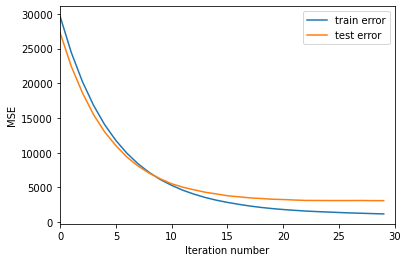

In [25]:
get_error_plot(n_trees, train_errors, test_errors)

In [66]:
def plot_trees_error(X_train, X_test, y_train, y_test, coef, max_depth, eta):  
    trees = [10, 30, 50, 100]
    results_train = [] 
    results_test = [] 
    
    
    for tree in trees:
        n_trees = tree
        coefs = [coef] * n_trees
        
        trs, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

        train_prediction = gb_predict(X_train, trs, coefs, eta)
        test_prediction = gb_predict(X_test, trs, coefs, eta)
        
        results_tr = mean_squared_error(y_train, train_prediction)
        results_ts = mean_squared_error(y_test, test_prediction)

        results_train.append(results_tr)
        results_test.append(results_ts)
                
    plt.figure(figsize=(15, 8))
    plt.xlabel('Number of trees')
    plt.ylabel('MSE')
    plt.plot(trees, results_train, label='train error')
    plt.plot(trees, results_test, label='test error')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

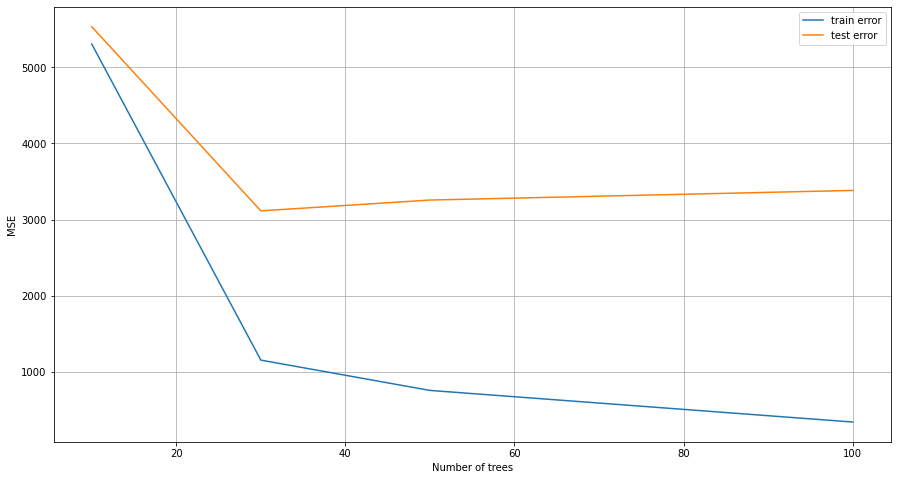

In [67]:
plot_trees_error(X_train, X_test, y_train, y_test, coef=1, max_depth=4, eta=0.1)

In [72]:
def plot_depth_error(X_train, X_test, y_train, y_test, n_trees, coef, eta):  
    max_depth = [1, 2, 3, 5, 10]
    results_train = [] 
    results_test = [] 
    
    
    for depth in max_depth:
        coefs = [coef] * n_trees
        
        trs, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, coefs, eta)

        train_prediction = gb_predict(X_train, trs, coefs, eta)
        test_prediction = gb_predict(X_test, trs, coefs, eta)
        
        results_tr = mean_squared_error(y_train, train_prediction)
        results_ts = mean_squared_error(y_test, test_prediction)

        results_train.append(results_tr)
        results_test.append(results_ts)
                
    plt.figure(figsize=(15, 8))
    plt.xlabel('Depth tree')
    plt.ylabel('MSE')
    plt.plot(max_depth, results_train, label='train error')
    plt.plot(max_depth, results_test, label='test error')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

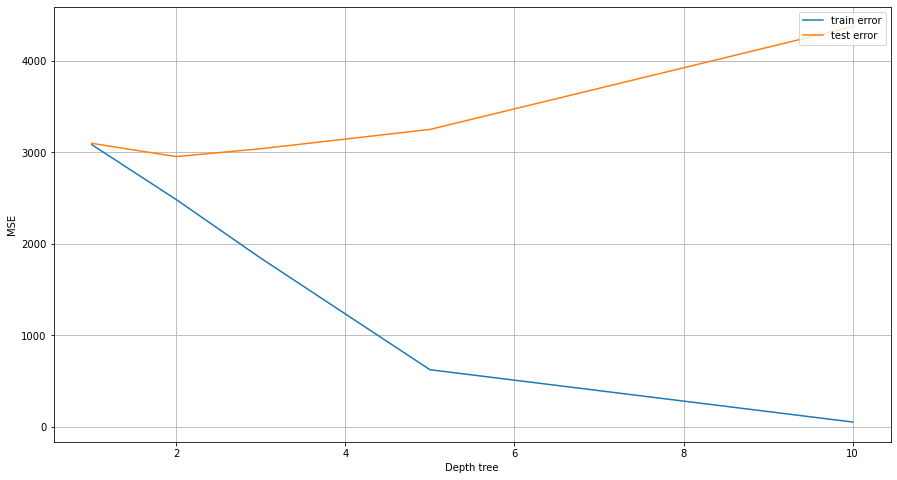

In [73]:
plot_depth_error(X_train, X_test, y_train, y_test, n_trees=30, coef=1, eta=0.1)

В нашем примере ошибка на тестовой выборке начиная с 30 деревьев увеличивается, в то время, как ошибка на тренировочой выборке уменьшается. Такие результаты свидетельствуют о переобучении. Оптимальным количеством деревьев в нашем случае можно считать 30 деревьев. Что касаемо максимальной глубины деревьев, то здесь пороговым значением будет являться 2.  

In [82]:
#Поэкспериментировав с шагом, мы получили следующие результаты
n_trees = 30
coefs = [1] * n_trees
max_depth = 2
eta = 0.09

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 2     с шагом 0.09 на тренировочной выборке: 2621.1910224608323
Ошибка алгоритма из 30 деревьев глубиной 2     с шагом 0.09 на тестовой выборке: 2966.3357782085336
